In [28]:
import functions
import algorithms 
import optSolverML_Woo_Seonho as optSolver
import collections
import numpy as np
import seaborn as sns
import scipy.io as sio 
import matplotlib.pyplot as plt

In [29]:
## Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0, data, compute_f, compute_g, pred_func):
        self.name = name
        self.x0 = x0
        self.X_train = data['X_train']
        self.y_train = data['y_train']
        self.X_test = data['X_test']
        self.y_test = data['y_test']

        self.compute_f = compute_f
        self.compute_g = compute_g
        self.pred_func = pred_func
        
class Method:
    def __init__(self, name, options_map):
        self.name = name
        class options:
            def __init__(self, options_map):
                for key in options_map.keys():
                    setattr(self, key, options_map[key])
        self.options = options(options_map)
        
class Options:
    def __init__(self, num_epoch = 20):
        self.num_epoch = num_epoch

## Datasets

### 1. Australian
#### Linear Least Squares

In [3]:
# Linear Least Squares
data = sio.loadmat('australian.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('australian_LS', x0, data, 
                  functions.least_square_func,
                  functions.least_square_grad,
                  functions.least_square_pred)
f_star = sio.loadmat('f_star_LS_australian.mat')['f_star']

### Gradient Descent with Backtracking Line Search

In [51]:
GD_options = Options(50)
GD_method = Method('GradientDescent',
                {'alpha_bar': 200, 'c1': 1e-2, 'tau': 0.9})
(x, loss_train_trace_GD, acc_train_trace_GD, 
 loss_test_trace_GD, acc_test_trace_GD)  = optSolver.optSolverML_Woo_Seonho(problem, GD_method, GD_options)
(f_star, loss_train_trace_GD[-1], acc_train_trace_GD[-1], loss_test_trace_GD[-1], acc_test_trace_GD[-1])

(array([[6.42046924e-12]]),
 0.01248466137295911,
 0.9989610389610389,
 0.011616213924514186,
 1.0)

In [52]:
## Stochastic Gradient Descent, Fixed Step Size
# parameter setting
SGDC_options = Options(50)
alpha_bar_set = [0.01, 0.05]
batch_size_set = [1, 1]
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)
    
## Stochastic Gradient Descent, Diminishing Step Size
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.5, 1, 2]
batch_size_set = [1, 1, 1]
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)

[[6.42046924e-12]] 0.004457438873012242 1.0 0.004381813358314204 1.0
[[6.42046924e-12]] 0.0009319564572273404 1.0 0.0009625358763717095 1.0
[[6.42046924e-12]] 0.22916508901440802 0.9506493506493506 0.22318216455297157 0.9624242424242424
[[6.42046924e-12]] 0.16802844803253378 0.9514285714285714 0.15461989512454535 0.9654545454545455
[[6.42046924e-12]] 0.14293274975778916 0.9477922077922077 0.12781225525921444 0.9666666666666667


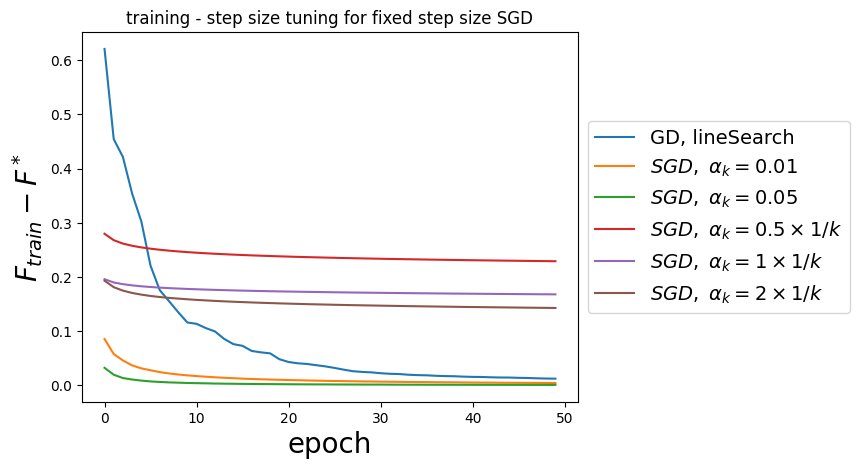

In [53]:
# plot: F_train - F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))

for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
    
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for fixed step size SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()

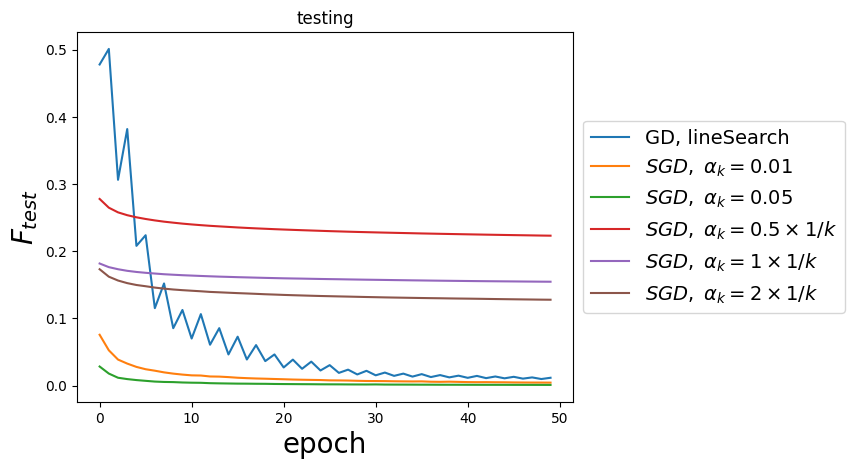

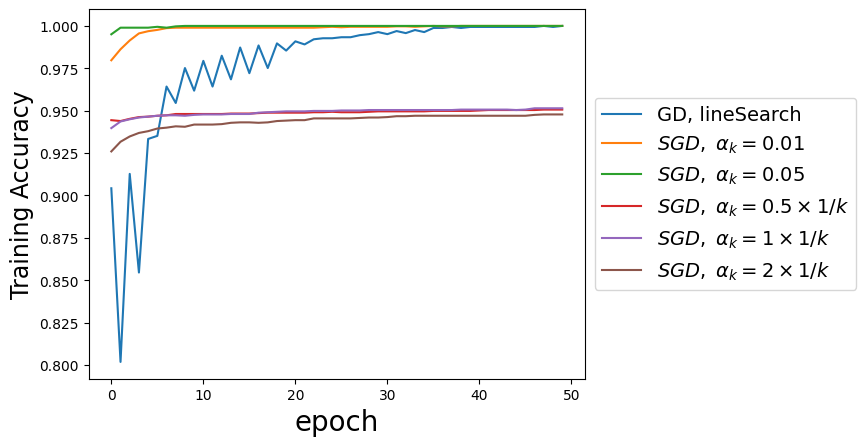

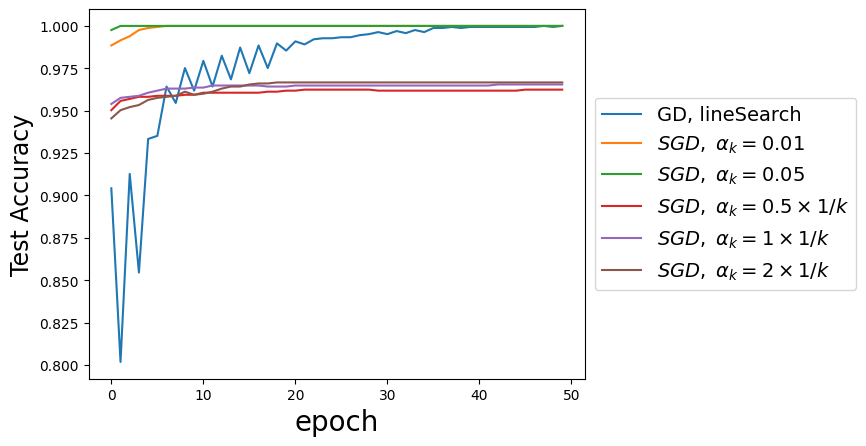

In [54]:
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("testing")
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
# plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300, bbox_inches='tight')
plt.show()
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300, bbox_inches='tight')
plt.show()

#### Logistic Regression

In [55]:
# Logistic regression
data = sio.loadmat('australian.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('australian_LR', x0, data, 
                  functions.logistic_func,
                  functions.logistic_grad,
                  functions.logistic_pred)
f_star = sio.loadmat('f_star_LR_australian.mat')['f_star']

In [57]:
GD_options = Options(50)
GD_method = Method('GradientDescent',
                {'alpha_bar': 200, 'c1': 1e-2, 'tau': 0.9})
(x, loss_train_trace_GD, acc_train_trace_GD, 
 loss_test_trace_GD, acc_test_trace_GD)  = optSolver.optSolverML_Woo_Seonho(problem, GD_method, GD_options)
(f_star, loss_train_trace_GD[-1], acc_train_trace_GD[-1], loss_test_trace_GD[-1], acc_test_trace_GD[-1])
## Stochastic Gradient Descent, Fixed Step Size
# parameter setting
SGDC_options = Options(50)
alpha_bar_set = [0.01, 0.05]
batch_size_set = [1, 1]
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)
    

[[0.3179751]] 0.3237419921918769 0.8689655172413793 0.3002094371426056 0.8924731182795699
[[0.3179751]] 0.33997084656163845 0.864367816091954 0.329358081415645 0.8817204301075269


[[0.3179751]] 0.3679877309370651 0.8620689655172413 0.35343685886826987 0.8924731182795699
[[0.3179751]] 0.345132014425227 0.864367816091954 0.33253662530103234 0.8978494623655914
[[0.3179751]] 0.3543702757265062 0.8666666666666667 0.3200901629644522 0.8817204301075269


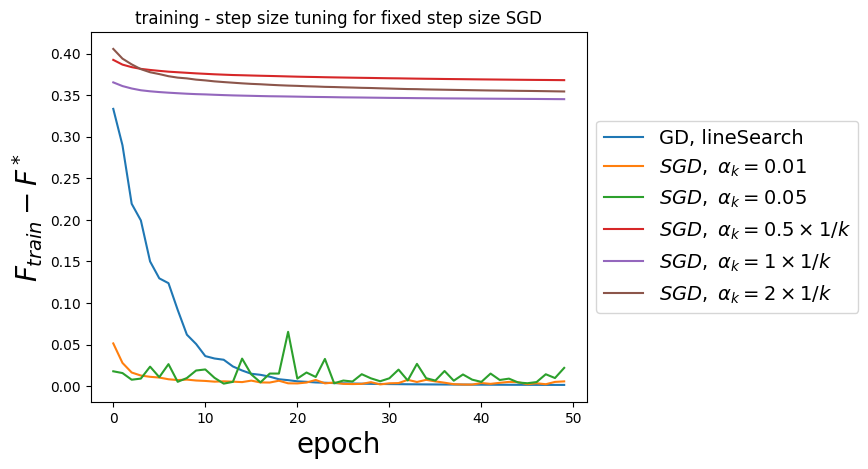

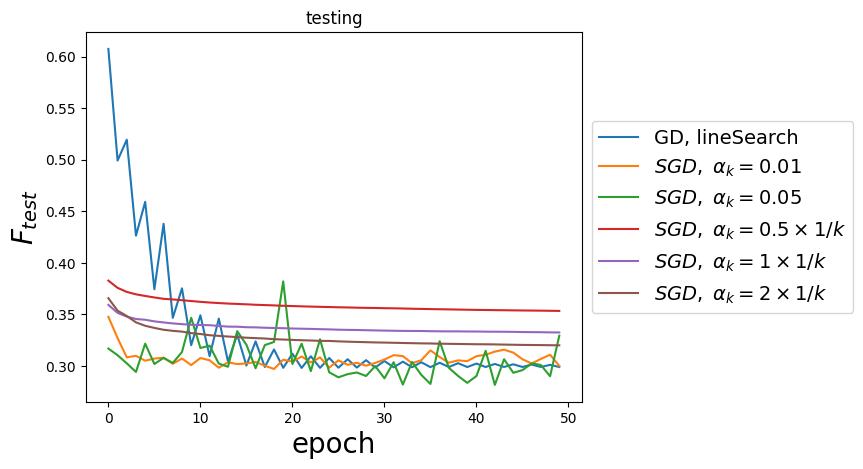

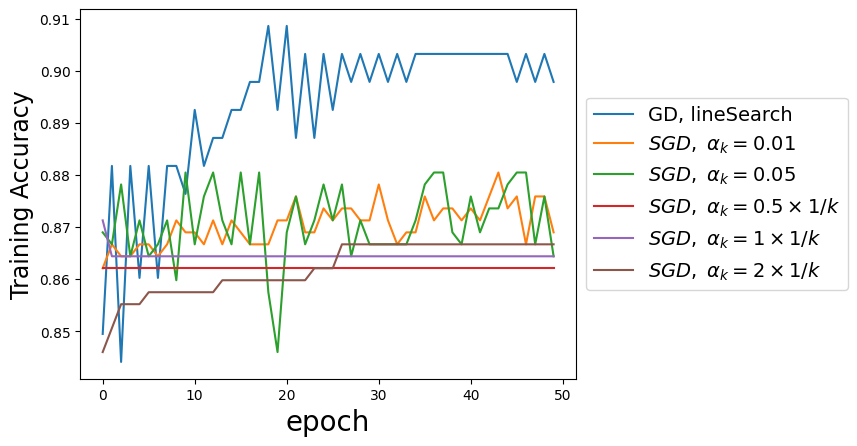

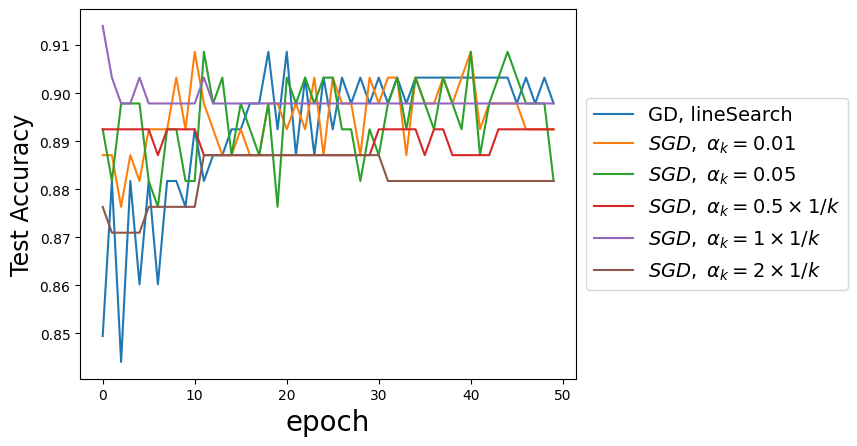

In [58]:
## Stochastic Gradient Descent, Diminishing Step Size
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.5, 1, 2]
batch_size_set = [1, 1, 1]
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)
# plot: F_train - F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))

for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
    
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for fixed step size SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("testing")
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
# plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300, bbox_inches='tight')
plt.show()
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300, bbox_inches='tight')
plt.show()

### 2. Mushroom
#### Linear Least Squares

In [59]:
# Linear Least Square 
data = sio.loadmat('mushroom.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('mushroom_LS', x0, data, 
                  functions.least_square_func,
                  functions.least_square_grad,
                  functions.least_square_pred)
f_star = sio.loadmat('f_star_LS_mushroom.mat')['f_star']

In [60]:
GD_options = Options(50)
GD_method = Method('GradientDescent',
                {'alpha_bar': 200, 'c1': 1e-2, 'tau': 0.9})
(x, loss_train_trace_GD, acc_train_trace_GD, 
 loss_test_trace_GD, acc_test_trace_GD)  = optSolver.optSolverML_Woo_Seonho(problem, GD_method, GD_options)
(f_star, loss_train_trace_GD[-1], acc_train_trace_GD[-1], loss_test_trace_GD[-1], acc_test_trace_GD[-1])
## Stochastic Gradient Descent, Fixed Step Size
# parameter setting
SGDC_options = Options(50)
alpha_bar_set = [0.01, 0.05]
batch_size_set = [1, 1]
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)

[[0.00231201]] 0.002547994739965871 0.9997402597402597 0.002301858502138367 1.0
[[0.00231201]] 0.009484169452630815 0.9997402597402597 0.008771267410044758 1.0


[[0.00231201]] 0.20465313399310361 0.9018181818181819 0.20576930247221212 0.8963636363636364
[[0.00231201]] 225.16894365885042 0.5348051948051948 232.76297154898094 0.5266666666666666
[[0.00231201]] 2657118.5776933725 0.461038961038961 2615173.0341383833 0.4593939393939394


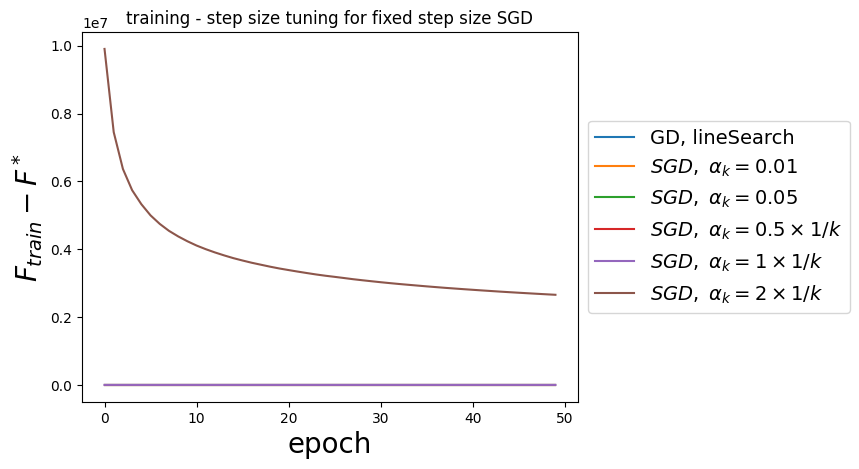

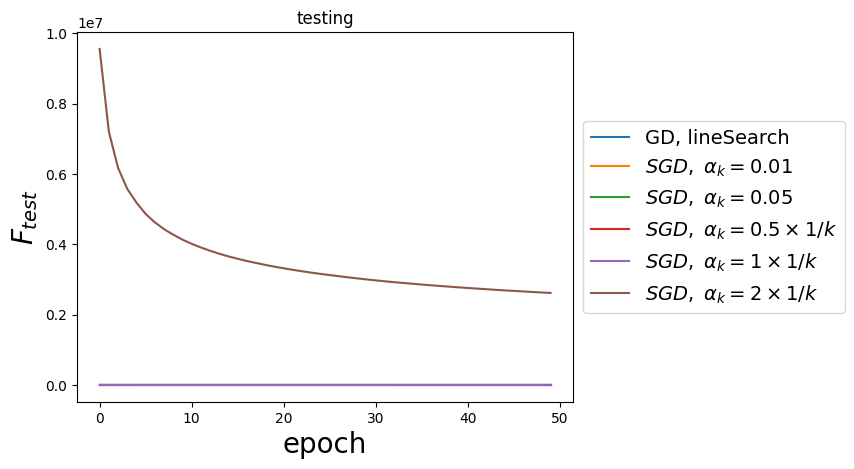

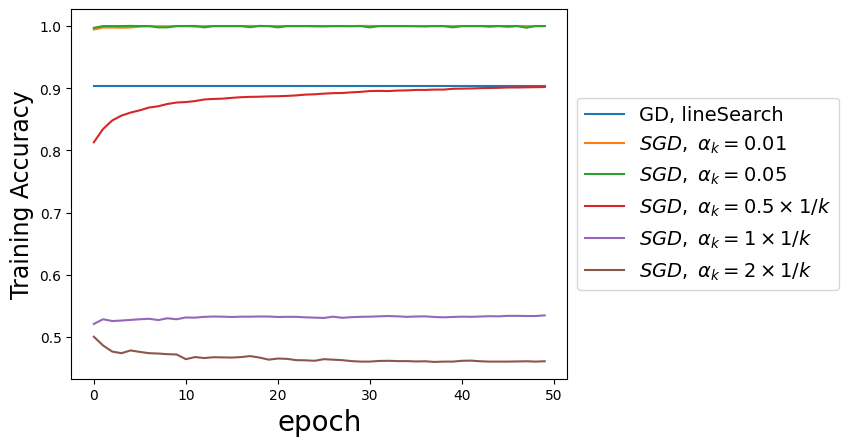

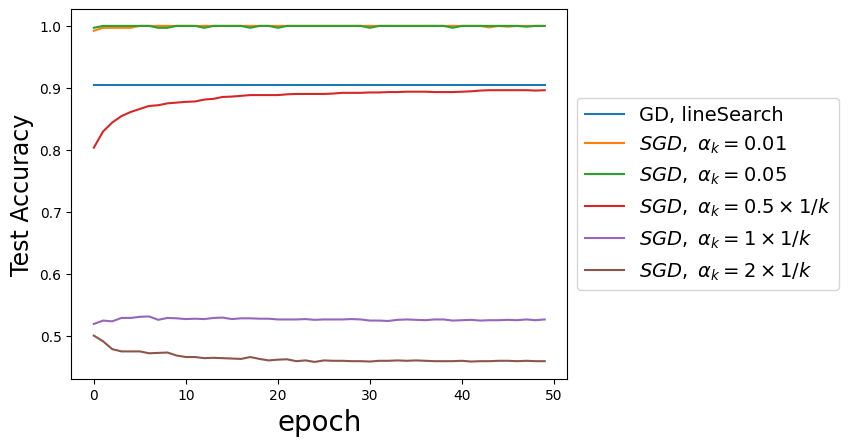

In [61]:
## Stochastic Gradient Descent, Diminishing Step Size
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.5, 1, 2]
batch_size_set = [1, 1, 1]
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)
# plot: F_train - F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))

for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
    
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for fixed step size SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("testing")
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
# plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300, bbox_inches='tight')
plt.show()
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300, bbox_inches='tight')
plt.show()

#### Logistic Regression

In [62]:
# Logistic Regression
data = sio.loadmat('mushroom.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('mushroom_LR', x0, data, 
                  functions.logistic_func,
                  functions.logistic_grad,
                  functions.logistic_pred)
f_star = sio.loadmat('f_star_LR_mushroom.mat')['f_star']

In [63]:
GD_options = Options(50)
GD_method = Method('GradientDescent',
                {'alpha_bar': 200, 'c1': 1e-2, 'tau': 0.9})
(x, loss_train_trace_GD, acc_train_trace_GD, 
 loss_test_trace_GD, acc_test_trace_GD)  = optSolver.optSolverML_Woo_Seonho(problem, GD_method, GD_options)
(f_star, loss_train_trace_GD[-1], acc_train_trace_GD[-1], loss_test_trace_GD[-1], acc_test_trace_GD[-1])
## Stochastic Gradient Descent, Fixed Step Size
# parameter setting
SGDC_options = Options(50)
alpha_bar_set = [0.01, 0.05]
batch_size_set = [1, 1]
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)
    
## Stochastic Gradient Descent, Diminishing Step Size
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.5, 1, 2]
batch_size_set = [1, 1, 1]
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)

[[6.42046924e-12]] 0.004506346029552417 1.0 0.004428293086685685 1.0
[[6.42046924e-12]] 0.0009283296232248799 1.0 0.000980233567453532 1.0
[[6.42046924e-12]] 0.23813122664453598 0.918961038961039 0.2274672826406 0.933939393939394
[[6.42046924e-12]] 0.16362229860739827 0.951948051948052 0.1509299167615818 0.9642424242424242
[[6.42046924e-12]] 0.1351832305939467 0.9659740259740259 0.12825449913481518 0.9696969696969697


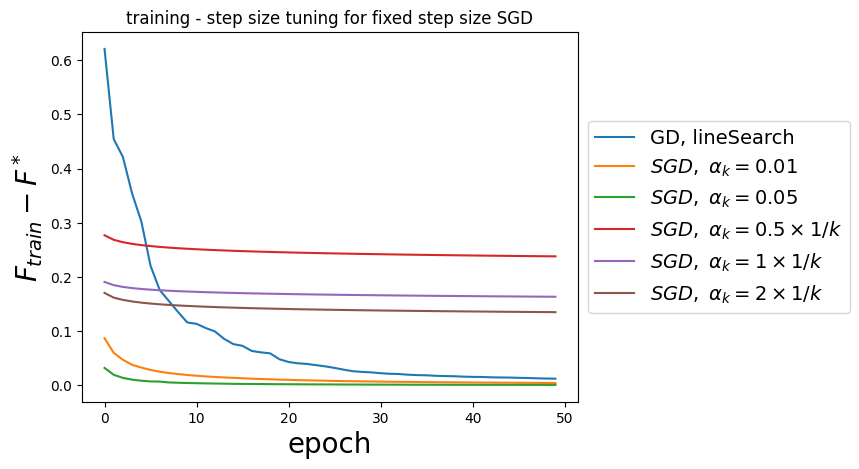

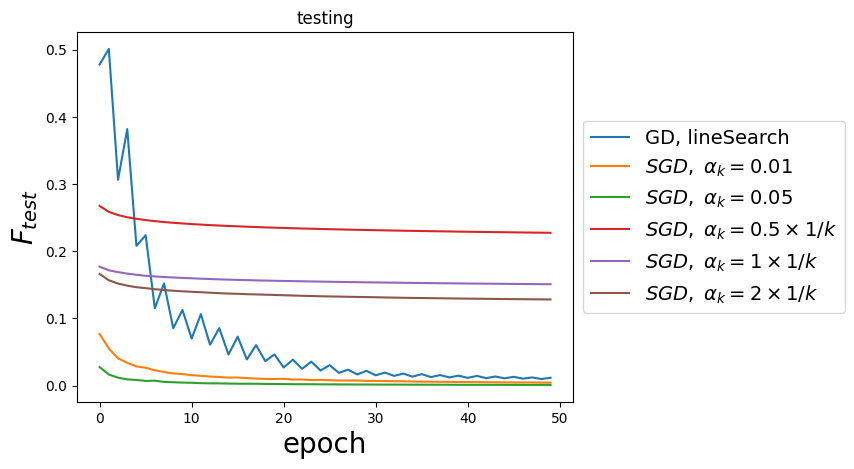

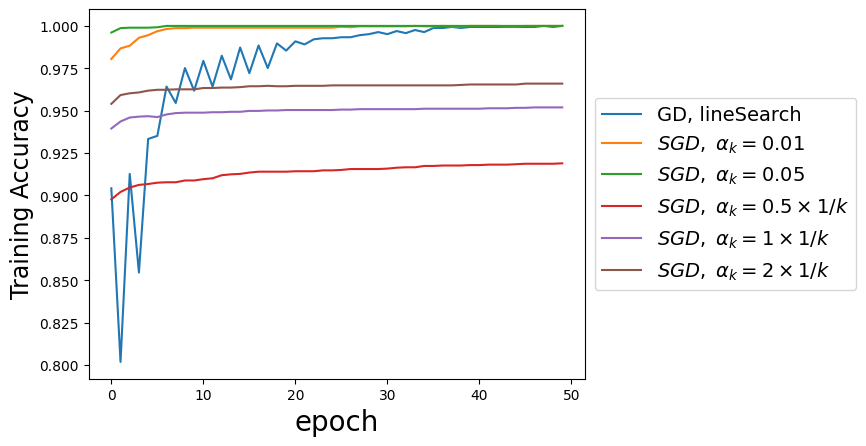

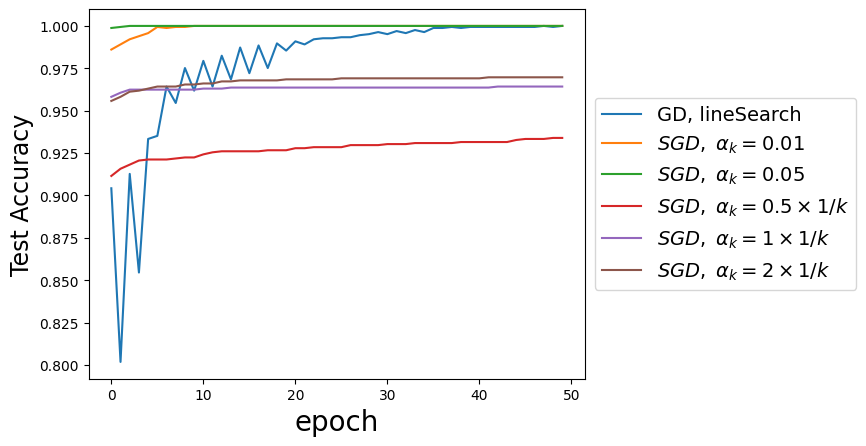

In [64]:
# plot: F_train - F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))

for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
    
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for fixed step size SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("testing")
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300, bbox_inches='tight')
plt.show()
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
# plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300, bbox_inches='tight')
plt.show()
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300, bbox_inches='tight')
plt.show()

#### Step size tuning

In [65]:
alpha_bar_set = [0.0001, 0.001, 0.01, 0.05, 0.1]
batch_size_set = [1,1,1,1,1]

# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)

[[6.42046924e-12]] 0.11944352260471855 0.9758441558441558 0.10929614353892154 0.983030303030303
[[6.42046924e-12]] 0.03241954306836696 0.9958441558441559 0.028744048644826763 0.9981818181818182
[[6.42046924e-12]] 0.004462578153436263 1.0 0.00441351910454769 1.0
[[6.42046924e-12]] 0.0009265576580986296 1.0 0.0009838565756296667 1.0
[[6.42046924e-12]] 0.00046525845473089603 1.0 0.0005074479944047966 1.0


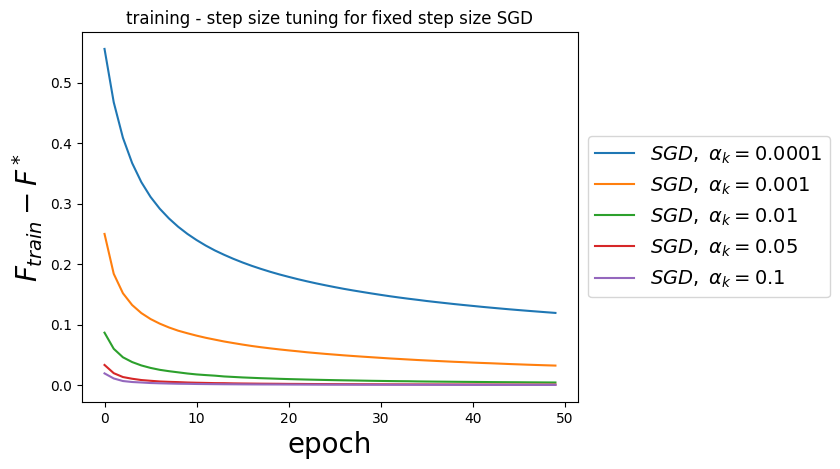

In [66]:
# plot: F_train - F^*

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))

plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for fixed step size SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.1, 0.25, 0.5, 0.9, 1, 2]
batch_size_set = [1, 1, 1, 1, 1, 1]
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)

[[6.42046924e-12]] 0.4524858227101549 0.9194805194805195 0.4499782123992444 0.9375757575757576
[[6.42046924e-12]] 0.3225585669699765 0.8880519480519481 0.31540120365191837 0.9084848484848485
[[6.42046924e-12]] 0.246711058196709 0.9085714285714286 0.23063469027171563 0.926060606060606
[[6.42046924e-12]] 0.17364910952549903 0.9553246753246754 0.16201120353468526 0.9672727272727273
[[6.42046924e-12]] 0.1823252957643233 0.9428571428571428 0.17539117340421542 0.9527272727272728
[[6.42046924e-12]] 0.17485755745696685 0.9402597402597402 0.1611105827237596 0.9503030303030303


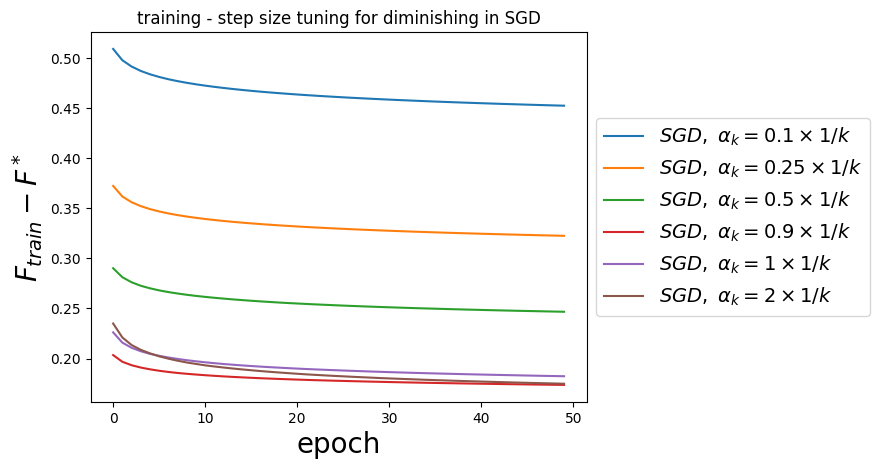

In [68]:
# plot: F_train - F^*
#alpha_bar_set = [0.01, 0.05]
#batch_size_set = [1, 1]

for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training - step size tuning for diminishing in SGD")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()

### Plots - all

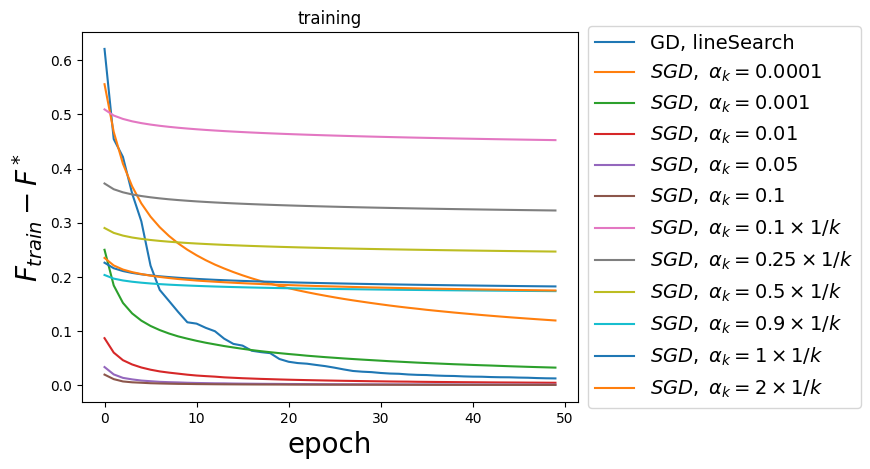

In [69]:
# plot: F_train - F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("training")
#plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300, bbox_inches='tight')
plt.show()

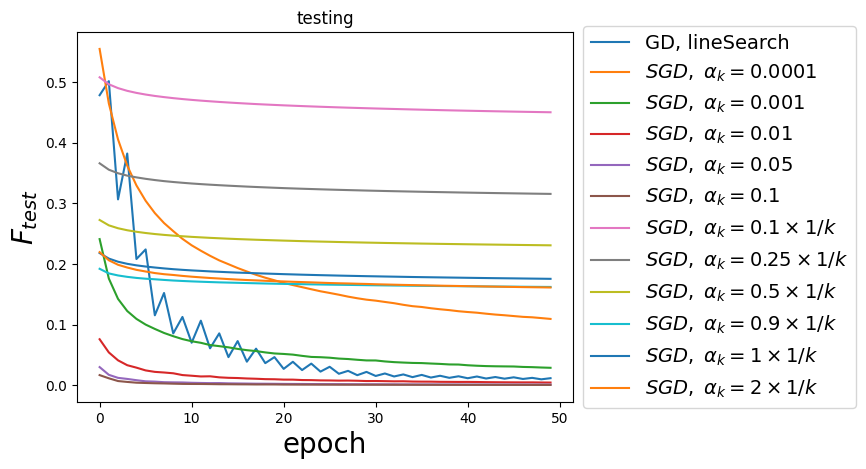

In [70]:
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title("testing")
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300, bbox_inches='tight')
plt.show()

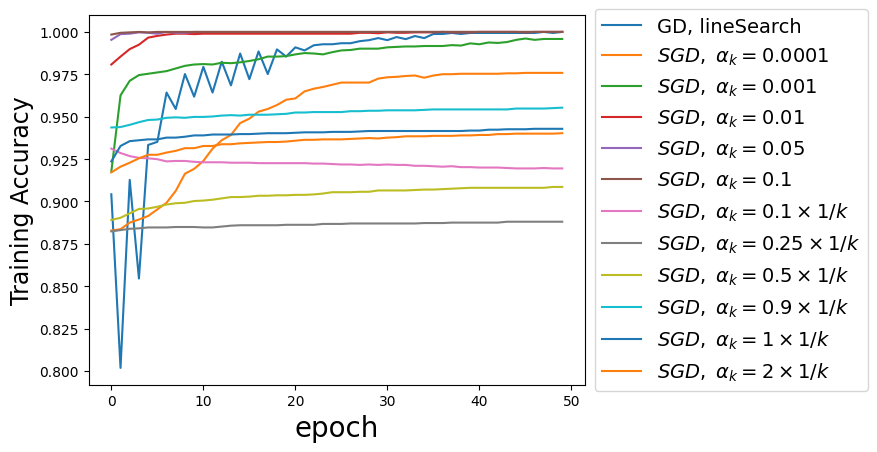

In [71]:
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
# plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300, bbox_inches='tight')
plt.show()

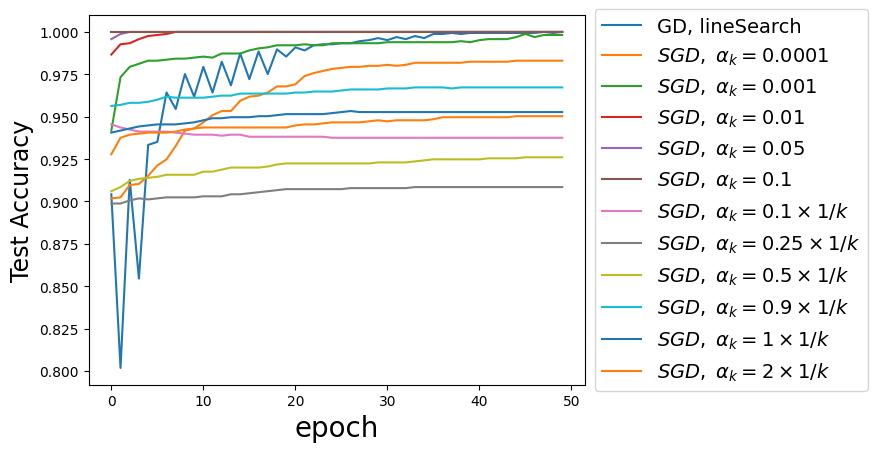

In [72]:
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300, bbox_inches='tight')
plt.show()

## Impact of Batch Size

In [73]:
# parameter setting set
SGDC_options = Options(30)
batch_size_set = [1, 8, 16, 32, 64, 128]

In [74]:
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for batch_size in batch_size_set:
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': 1, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_Woo_Seonho(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)

[[6.42046924e-12]] 5.216130117926312e-05 1.0 6.114343744115506e-05 1.0
[[6.42046924e-12]] 0.0006331141097508275 1.0 0.0006973976147222631 1.0
[[6.42046924e-12]] 0.0012151473863596745 1.0 0.0012785923545339181 1.0
[[6.42046924e-12]] 0.0024327209628884298 1.0 0.002408223762797934 1.0
[[6.42046924e-12]] 0.004755681494332648 1.0 0.004683822978778555 1.0
[[6.42046924e-12]] 0.00921075491211223 0.9989610389610389 0.008494082525954872 1.0


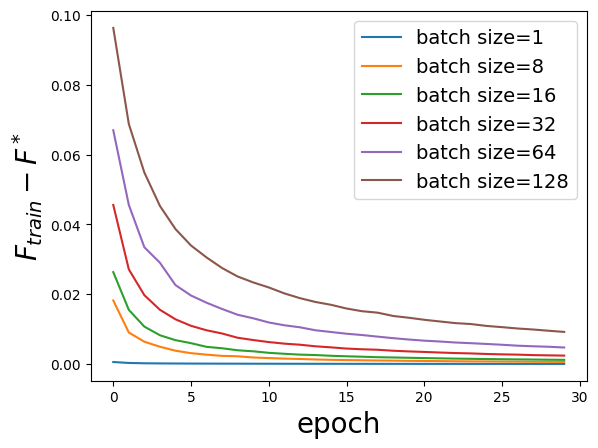

In [75]:
for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'batch size={}'.format(method.options.batch_size))

plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(fontsize=14)
#plt.savefig('../../report/fig/' + problem.name + '_train_loss_batch', dpi=300, bbox_inches='tight')
plt.show()

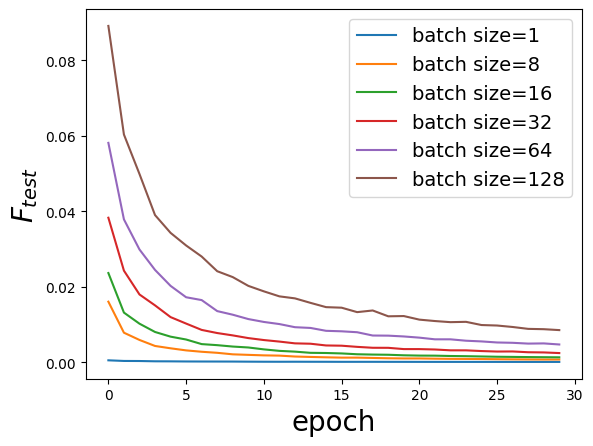

In [76]:
for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)),  y=metric_trace,
                 label=r'batch size={}'.format(method.options.batch_size))
    
plt.legend(fontsize=14)
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_loss_batch', dpi=300, bbox_inches='tight')
plt.show()

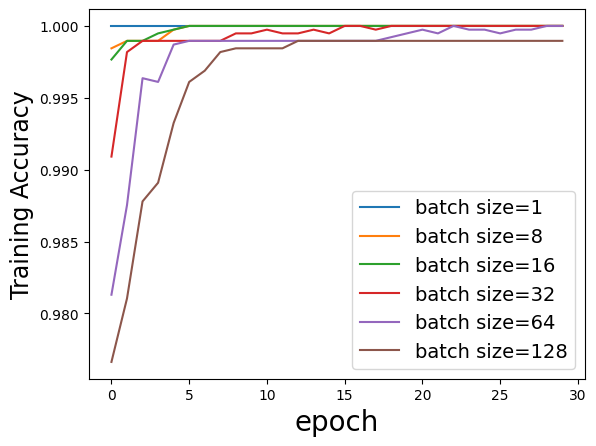

In [77]:
for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'batch size={}'.format(method.options.batch_size))
    
plt.legend(fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_train_acc_batch', dpi=300, bbox_inches='tight')
plt.show()

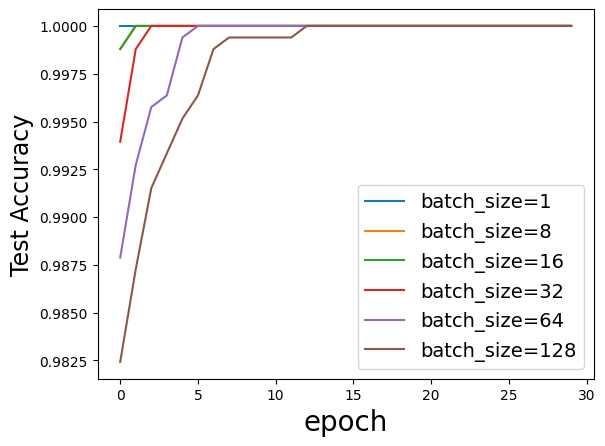

In [78]:
for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'batch_size={}'.format(method.options.batch_size))

plt.legend(fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
#plt.savefig('../../report/fig/' + problem.name + '_test_acc_batch', dpi=300, bbox_inches='tight')
plt.show()